In [59]:
import numpy as np
import nnfs # package by the book's author to generate random data
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

# Neural network with one hidden layer

In [58]:
inputs = [[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8],
          [1.0, 2.0, 3.0, 2.5],
          [1.0, 2.0, 3.0, 2.5],
          [1.0, 2.0, 3.0, 2.5]] # additional input, lets say a pixel value


weights = [[0.2, 0.8, -0.5, 1.0], # the number of weights represent the number of neurons / inputs from previous layer - 6
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87],
           [-0.26, -0.27, 0.17, 1],
           [-0.26, -0.27, 0.17, 1],
           [-0.26, -0.27, 0.17, 1]] # transforms to the same number of arguments in weights, because each pixel value 
                                    # has to have its own weight, since the shape is (6,4), the next layer
                                    # needs to have a shape of (6,x)


biases = [2.0, 3.0, 0.5, 5, 4, 7]

# 3 weights each as there are 3 neurons

weights_2 = [[0.2, 0.8, -0.5,5, 1, 1], # the next layers shape is (2,6), since its being transposed it becomes (6,2) which
           [0.5, -0.91, 0.26,5, 1, 1]] # can be connected to the next layer

biases_2 = [2.0, 3.0] # number of biases represent how many neurons there are in the given layer
           
           
layer_1_output = np.dot(inputs, np.array(weights).T) + biases
final_output = np.dot(layer_1_output, np.array(weights_2).T) + biases_2

# Using nnfs package to create non linear data

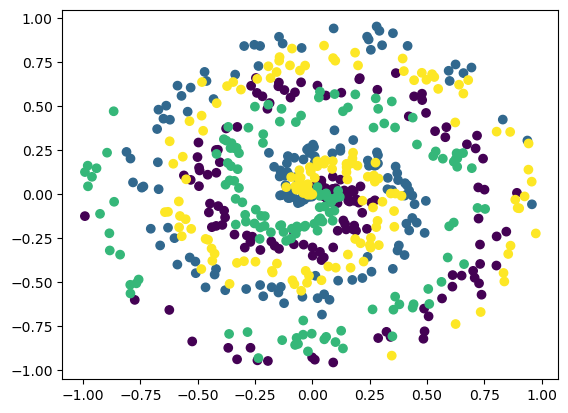

In [82]:
X, y = spiral_data(samples = 150, classes = 4)

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

# Creating a Dense Layer class

In [124]:
# Dense Layer

class Layer_Dense:
  # initializing the layer
  def __init__(self, n_inputs, n_neurons):
      # initializing weights and biases
      self.weights = 0.01 * np.random.rand(n_inputs, n_neurons) # multiply by 0.01 smaller values take less time to fit
       # np.random.rand(n_inputs, n_neurons) instead of np.random.rand(n_neurons, n_inputs) to not have to transpose it
      self.biases = np.zeros((1, n_neurons)) # biases are 0 to not have a neuron fire if the data is = 0
      
  def forward(self, inputs):
    # calculate the output values from the inputs, weights and biases
    self.output = np.dot(inputs, self.weights) + self.biases
    
    
# Creating a dataset

X, y = spiral_data(samples = 100, classes = 2)

# Creating a Dense Layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Performing a forward pass of the training data through the layer3
dense1.forward(X)

In [119]:
# as there are 100 samples for each class, in total there are 300 inputs, so the network looks like:


# input layer each neuron having 3 weights      Dense Layer   - 200   neurons each having 3 weights     while the biases are [0., 0., 0.]

# 1  [0.00348133, 0.00326161, 0.0023926 ]       1   [0.00348133, 0.00326161, 0.0023926 ] 
#                       
# 2                                             200 [0.00526624, 0.00700263, 0.00908433]

dense1.weights


array([[0.00348133, 0.00326161, 0.0023926 ],
       [0.00526624, 0.00700263, 0.00908433]])

In [127]:
dense1.biases

array([[0., 0., 0.]])